In [1]:
import numpy as np
import matplotlib.pyplot as plt
from src.worldModels import *
import scipy.io
import os.path
import os
from src.utils import *
from src.run_simulations import *
from src.decoding import *
from src.agents import *
from sklearn import svm
import pickle
from tqdm import tqdm
import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import display
from sklearn.linear_model import LinearRegression
from src.expfitting import *

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning, module='utils')


%matplotlib notebook
%reload_ext autoreload
%autoreload 2

## Repeated simulations of Q-learning and inference-based behavior 

### Q-learning

In [2]:
# Get metrics for all points in the Qspace
Ngamma = 25
Neps = 20
rlow = 0.3
gammalst = np.linspace(0.01, 1.4, Ngamma)
epslst = np.linspace(0.01, 0.5, Neps)
Niters = 50

Qeff_arr = np.zeros((Ngamma, Neps, Niters)) * np.nan
Qlapse_arr = np.zeros((Ngamma, Neps, Niters)) * np.nan
Qoffset_arr = np.zeros((Ngamma, Neps, Niters)) * np.nan
Qslope_arr = np.zeros((Ngamma, Neps, Niters)) * np.nan


for idgamma, gamma in enumerate(gammalst):
    for ideps, eps in enumerate(epslst):
        print(gamma, eps)
        metrics = get_Qmetrics(gamma, eps, N_iters=Niters, rlow=rlow)
        Qeff_arr[idgamma, ideps, :] = metrics[0]
        Qlapse_arr[idgamma, ideps, :] = metrics[1]
        Qoffset_arr[idgamma, ideps, :] = metrics[2]
        Qslope_arr[idgamma, ideps, :] = metrics[3]
        

0.01 0.01
0.01 0.035789473684210524


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


0.01 0.06157894736842105
0.01 0.08736842105263157
0.01 0.1131578947368421


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


0.01 0.13894736842105262


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


0.01 0.16473684210526315


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


0.01 0.19052631578947368


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


0.01 0.2163157894736842


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


0.01 0.24210526315789474


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


0.01 0.26789473684210524


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


0.01 0.29368421052631577


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


0.01 0.3194736842105263


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


0.01 0.3452631578947368


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


0.01 0.37105263157894736


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


0.01 0.3968421052631579


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


0.01 0.4226315789473684


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


0.01 0.44842105263157894


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur

0.01 0.47421052631578947


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


0.01 0.5


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


0.06791666666666667 0.01


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


0.06791666666666667 0.035789473684210524
0.06791666666666667 0.06157894736842105
0.06791666666666667 0.08736842105263157
0.06791666666666667 0.1131578947368421
0.06791666666666667 0.13894736842105262
0.06791666666666667 0.16473684210526315


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


0.06791666666666667 0.19052631578947368


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


0.06791666666666667 0.2163157894736842
0.06791666666666667 0.24210526315789474


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


0.06791666666666667 0.26789473684210524


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


0.06791666666666667 0.29368421052631577


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


0.06791666666666667 0.3194736842105263


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


0.06791666666666667 0.3452631578947368


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


0.06791666666666667 0.37105263157894736


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


0.06791666666666667 0.3968421052631579


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


0.06791666666666667 0.4226315789473684


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


0.06791666666666667 0.44842105263157894


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


0.06791666666666667 0.47421052631578947


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


0.06791666666666667 0.5


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


0.12583333333333332 0.01
0.12583333333333332 0.035789473684210524
0.12583333333333332 0.06157894736842105
0.12583333333333332 0.08736842105263157
0.12583333333333332 0.1131578947368421
0.12583333333333332 0.13894736842105262


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


0.12583333333333332 0.16473684210526315
0.12583333333333332 0.19052631578947368


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


0.12583333333333332 0.2163157894736842
0.12583333333333332 0.24210526315789474
0.12583333333333332 0.26789473684210524
0.12583333333333332 0.29368421052631577


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


0.12583333333333332 0.3194736842105263
0.12583333333333332 0.3452631578947368
0.12583333333333332 0.37105263157894736
0.12583333333333332 0.3968421052631579
0.12583333333333332 0.4226315789473684
0.12583333333333332 0.44842105263157894


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


0.12583333333333332 0.47421052631578947


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


0.12583333333333332 0.5


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


0.18375 0.01
0.18375 0.035789473684210524


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


0.18375 0.06157894736842105
0.18375 0.08736842105263157


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


0.18375 0.1131578947368421
0.18375 0.13894736842105262
0.18375 0.16473684210526315
0.18375 0.19052631578947368
0.18375 0.2163157894736842


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


0.18375 0.24210526315789474
0.18375 0.26789473684210524
0.18375 0.29368421052631577
0.18375 0.3194736842105263
0.18375 0.3452631578947368


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


0.18375 0.37105263157894736


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


0.18375 0.3968421052631579
0.18375 0.4226315789473684
0.18375 0.44842105263157894


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


0.18375 0.47421052631578947


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


0.18375 0.5


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


0.24166666666666667 0.01
0.24166666666666667 0.035789473684210524
0.24166666666666667 0.06157894736842105
0.24166666666666667 0.08736842105263157
0.24166666666666667 0.1131578947368421
0.24166666666666667 0.13894736842105262
0.24166666666666667 0.16473684210526315
0.24166666666666667 0.19052631578947368
0.24166666666666667 0.2163157894736842


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


0.24166666666666667 0.24210526315789474


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


0.24166666666666667 0.26789473684210524
0.24166666666666667 0.29368421052631577
0.24166666666666667 0.3194736842105263
0.24166666666666667 0.3452631578947368


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


0.24166666666666667 0.37105263157894736


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


0.24166666666666667 0.3968421052631579
0.24166666666666667 0.4226315789473684


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


0.24166666666666667 0.44842105263157894


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


0.24166666666666667 0.47421052631578947


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


0.24166666666666667 0.5
0.2995833333333333 0.01
0.2995833333333333 0.035789473684210524
0.2995833333333333 0.06157894736842105
0.2995833333333333 0.08736842105263157
0.2995833333333333 0.1131578947368421
0.2995833333333333 0.13894736842105262


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


0.2995833333333333 0.16473684210526315
0.2995833333333333 0.19052631578947368


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


0.2995833333333333 0.2163157894736842
0.2995833333333333 0.24210526315789474
0.2995833333333333 0.26789473684210524


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


0.2995833333333333 0.29368421052631577


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


0.2995833333333333 0.3194736842105263
0.2995833333333333 0.3452631578947368
0.2995833333333333 0.37105263157894736
0.2995833333333333 0.3968421052631579
0.2995833333333333 0.4226315789473684


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


0.2995833333333333 0.44842105263157894


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


0.2995833333333333 0.47421052631578947


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


0.2995833333333333 0.5
0.3575 0.01
0.3575 0.035789473684210524
0.3575 0.06157894736842105


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


0.3575 0.08736842105263157
0.3575 0.1131578947368421
0.3575 0.13894736842105262
0.3575 0.16473684210526315


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


0.3575 0.19052631578947368
0.3575 0.2163157894736842
0.3575 0.24210526315789474
0.3575 0.26789473684210524
0.3575 0.29368421052631577


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


0.3575 0.3194736842105263
0.3575 0.3452631578947368
0.3575 0.37105263157894736


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


0.3575 0.3968421052631579
0.3575 0.4226315789473684
0.3575 0.44842105263157894
0.3575 0.47421052631578947


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


0.3575 0.5
0.41541666666666666 0.01
0.41541666666666666 0.035789473684210524
0.41541666666666666 0.06157894736842105
0.41541666666666666 0.08736842105263157
0.41541666666666666 0.1131578947368421
0.41541666666666666 0.13894736842105262
0.41541666666666666 0.16473684210526315
0.41541666666666666 0.19052631578947368
0.41541666666666666 0.2163157894736842


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


0.41541666666666666 0.24210526315789474
0.41541666666666666 0.26789473684210524


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


0.41541666666666666 0.29368421052631577
0.41541666666666666 0.3194736842105263
0.41541666666666666 0.3452631578947368
0.41541666666666666 0.37105263157894736
0.41541666666666666 0.3968421052631579


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


0.41541666666666666 0.4226315789473684
0.41541666666666666 0.44842105263157894


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


0.41541666666666666 0.47421052631578947
0.41541666666666666 0.5
0.47333333333333333 0.01
0.47333333333333333 0.035789473684210524
0.47333333333333333 0.06157894736842105
0.47333333333333333 0.08736842105263157
0.47333333333333333 0.1131578947368421
0.47333333333333333 0.13894736842105262
0.47333333333333333 0.16473684210526315
0.47333333333333333 0.19052631578947368


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


0.47333333333333333 0.2163157894736842
0.47333333333333333 0.24210526315789474


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


0.47333333333333333 0.26789473684210524


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


0.47333333333333333 0.29368421052631577
0.47333333333333333 0.3194736842105263
0.47333333333333333 0.3452631578947368
0.47333333333333333 0.37105263157894736


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


0.47333333333333333 0.3968421052631579
0.47333333333333333 0.4226315789473684
0.47333333333333333 0.44842105263157894
0.47333333333333333 0.47421052631578947
0.47333333333333333 0.5
0.53125 0.01
0.53125 0.035789473684210524
0.53125 0.06157894736842105
0.53125 0.08736842105263157
0.53125 0.1131578947368421
0.53125 0.13894736842105262
0.53125 0.16473684210526315
0.53125 0.19052631578947368
0.53125 0.2163157894736842
0.53125 0.24210526315789474
0.53125 0.26789473684210524


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


0.53125 0.29368421052631577
0.53125 0.3194736842105263
0.53125 0.3452631578947368
0.53125 0.37105263157894736


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


0.53125 0.3968421052631579


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


0.53125 0.4226315789473684
0.53125 0.44842105263157894
0.53125 0.47421052631578947
0.53125 0.5
0.5891666666666666 0.01
0.5891666666666666 0.035789473684210524
0.5891666666666666 0.06157894736842105
0.5891666666666666 0.08736842105263157
0.5891666666666666 0.1131578947368421
0.5891666666666666 0.13894736842105262
0.5891666666666666 0.16473684210526315
0.5891666666666666 0.19052631578947368
0.5891666666666666 0.2163157894736842
0.5891666666666666 0.24210526315789474
0.5891666666666666 0.26789473684210524


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


0.5891666666666666 0.29368421052631577
0.5891666666666666 0.3194736842105263
0.5891666666666666 0.3452631578947368
0.5891666666666666 0.37105263157894736


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


0.5891666666666666 0.3968421052631579


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


0.5891666666666666 0.4226315789473684
0.5891666666666666 0.44842105263157894
0.5891666666666666 0.47421052631578947
0.5891666666666666 0.5
0.6470833333333333 0.01
0.6470833333333333 0.035789473684210524
0.6470833333333333 0.06157894736842105
0.6470833333333333 0.08736842105263157
0.6470833333333333 0.1131578947368421
0.6470833333333333 0.13894736842105262
0.6470833333333333 0.16473684210526315
0.6470833333333333 0.19052631578947368
0.6470833333333333 0.2163157894736842
0.6470833333333333 0.24210526315789474
0.6470833333333333 0.26789473684210524


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


0.6470833333333333 0.29368421052631577
0.6470833333333333 0.3194736842105263
0.6470833333333333 0.3452631578947368
0.6470833333333333 0.37105263157894736


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


0.6470833333333333 0.3968421052631579


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


0.6470833333333333 0.4226315789473684
0.6470833333333333 0.44842105263157894
0.6470833333333333 0.47421052631578947
0.6470833333333333 0.5
0.705 0.01
0.705 0.035789473684210524
0.705 0.06157894736842105
0.705 0.08736842105263157
0.705 0.1131578947368421
0.705 0.13894736842105262
0.705 0.16473684210526315
0.705 0.19052631578947368
0.705 0.2163157894736842
0.705 0.24210526315789474
0.705 0.26789473684210524


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


0.705 0.29368421052631577
0.705 0.3194736842105263
0.705 0.3452631578947368
0.705 0.37105263157894736


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


0.705 0.3968421052631579


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


0.705 0.4226315789473684
0.705 0.44842105263157894
0.705 0.47421052631578947
0.705 0.5
0.7629166666666667 0.01
0.7629166666666667 0.035789473684210524
0.7629166666666667 0.06157894736842105
0.7629166666666667 0.08736842105263157
0.7629166666666667 0.1131578947368421
0.7629166666666667 0.13894736842105262
0.7629166666666667 0.16473684210526315
0.7629166666666667 0.19052631578947368
0.7629166666666667 0.2163157894736842
0.7629166666666667 0.24210526315789474
0.7629166666666667 0.26789473684210524


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


0.7629166666666667 0.29368421052631577
0.7629166666666667 0.3194736842105263
0.7629166666666667 0.3452631578947368
0.7629166666666667 0.37105263157894736


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


0.7629166666666667 0.3968421052631579


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


0.7629166666666667 0.4226315789473684
0.7629166666666667 0.44842105263157894
0.7629166666666667 0.47421052631578947
0.7629166666666667 0.5
0.8208333333333333 0.01
0.8208333333333333 0.035789473684210524
0.8208333333333333 0.06157894736842105
0.8208333333333333 0.08736842105263157
0.8208333333333333 0.1131578947368421
0.8208333333333333 0.13894736842105262
0.8208333333333333 0.16473684210526315
0.8208333333333333 0.19052631578947368
0.8208333333333333 0.2163157894736842
0.8208333333333333 0.24210526315789474
0.8208333333333333 0.26789473684210524


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


0.8208333333333333 0.29368421052631577
0.8208333333333333 0.3194736842105263
0.8208333333333333 0.3452631578947368
0.8208333333333333 0.37105263157894736


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


0.8208333333333333 0.3968421052631579


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


0.8208333333333333 0.4226315789473684
0.8208333333333333 0.44842105263157894
0.8208333333333333 0.47421052631578947
0.8208333333333333 0.5
0.87875 0.01
0.87875 0.035789473684210524
0.87875 0.06157894736842105
0.87875 0.08736842105263157
0.87875 0.1131578947368421
0.87875 0.13894736842105262
0.87875 0.16473684210526315
0.87875 0.19052631578947368
0.87875 0.2163157894736842
0.87875 0.24210526315789474
0.87875 0.26789473684210524
0.87875 0.29368421052631577
0.87875 0.3194736842105263
0.87875 0.3452631578947368
0.87875 0.37105263157894736


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


0.87875 0.3968421052631579


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


0.87875 0.4226315789473684
0.87875 0.44842105263157894
0.87875 0.47421052631578947
0.87875 0.5
0.9366666666666666 0.01
0.9366666666666666 0.035789473684210524
0.9366666666666666 0.06157894736842105
0.9366666666666666 0.08736842105263157
0.9366666666666666 0.1131578947368421
0.9366666666666666 0.13894736842105262
0.9366666666666666 0.16473684210526315


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


0.9366666666666666 0.19052631578947368
0.9366666666666666 0.2163157894736842
0.9366666666666666 0.24210526315789474
0.9366666666666666 0.26789473684210524
0.9366666666666666 0.29368421052631577
0.9366666666666666 0.3194736842105263
0.9366666666666666 0.3452631578947368


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


0.9366666666666666 0.37105263157894736
0.9366666666666666 0.3968421052631579
0.9366666666666666 0.4226315789473684
0.9366666666666666 0.44842105263157894


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


0.9366666666666666 0.47421052631578947
0.9366666666666666 0.5
0.9945833333333333 0.01


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


0.9945833333333333 0.035789473684210524
0.9945833333333333 0.06157894736842105
0.9945833333333333 0.08736842105263157
0.9945833333333333 0.1131578947368421
0.9945833333333333 0.13894736842105262
0.9945833333333333 0.16473684210526315
0.9945833333333333 0.19052631578947368
0.9945833333333333 0.2163157894736842
0.9945833333333333 0.24210526315789474
0.9945833333333333 0.26789473684210524
0.9945833333333333 0.29368421052631577
0.9945833333333333 0.3194736842105263
0.9945833333333333 0.3452631578947368
0.9945833333333333 0.37105263157894736


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


0.9945833333333333 0.3968421052631579
0.9945833333333333 0.4226315789473684
0.9945833333333333 0.44842105263157894
0.9945833333333333 0.47421052631578947
0.9945833333333333 0.5
1.0525 0.01


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


1.0525 0.035789473684210524


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


1.0525 0.06157894736842105


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


1.0525 0.08736842105263157


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


1.0525 0.1131578947368421


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


1.0525 0.13894736842105262


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


1.0525 0.16473684210526315


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


1.0525 0.19052631578947368


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


1.0525 0.2163157894736842
1.0525 0.24210526315789474


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


1.0525 0.26789473684210524
1.0525 0.29368421052631577


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


1.0525 0.3194736842105263


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


1.0525 0.3452631578947368
1.0525 0.37105263157894736
1.0525 0.3968421052631579


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


1.0525 0.4226315789473684
1.0525 0.44842105263157894


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


1.0525 0.47421052631578947
1.0525 0.5


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


1.1104166666666666 0.01


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


1.1104166666666666 0.035789473684210524


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


1.1104166666666666 0.06157894736842105


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


1.1104166666666666 0.08736842105263157


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


1.1104166666666666 0.1131578947368421


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


1.1104166666666666 0.13894736842105262


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


1.1104166666666666 0.16473684210526315


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


1.1104166666666666 0.19052631578947368


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


1.1104166666666666 0.2163157894736842
1.1104166666666666 0.24210526315789474


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


1.1104166666666666 0.26789473684210524
1.1104166666666666 0.29368421052631577


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


1.1104166666666666 0.3194736842105263


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


1.1104166666666666 0.3452631578947368
1.1104166666666666 0.37105263157894736
1.1104166666666666 0.3968421052631579


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


1.1104166666666666 0.4226315789473684
1.1104166666666666 0.44842105263157894


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


1.1104166666666666 0.47421052631578947
1.1104166666666666 0.5
1.1683333333333332 0.01


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


1.1683333333333332 0.035789473684210524


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


1.1683333333333332 0.06157894736842105


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


1.1683333333333332 0.08736842105263157


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


1.1683333333333332 0.1131578947368421


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


1.1683333333333332 0.13894736842105262


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


1.1683333333333332 0.16473684210526315


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


1.1683333333333332 0.19052631578947368


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


1.1683333333333332 0.2163157894736842
1.1683333333333332 0.24210526315789474


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


1.1683333333333332 0.26789473684210524
1.1683333333333332 0.29368421052631577


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


1.1683333333333332 0.3194736842105263


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


1.1683333333333332 0.3452631578947368
1.1683333333333332 0.37105263157894736
1.1683333333333332 0.3968421052631579


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


1.1683333333333332 0.4226315789473684
1.1683333333333332 0.44842105263157894


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


1.1683333333333332 0.47421052631578947
1.1683333333333332 0.5
1.22625 0.01


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


1.22625 0.035789473684210524


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


1.22625 0.06157894736842105


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


1.22625 0.08736842105263157


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


1.22625 0.1131578947368421


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


1.22625 0.13894736842105262


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


1.22625 0.16473684210526315


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


1.22625 0.19052631578947368


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


1.22625 0.2163157894736842
1.22625 0.24210526315789474


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


1.22625 0.26789473684210524
1.22625 0.29368421052631577


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


1.22625 0.3194736842105263


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


1.22625 0.3452631578947368
1.22625 0.37105263157894736
1.22625 0.3968421052631579


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


1.22625 0.4226315789473684
1.22625 0.44842105263157894


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


1.22625 0.47421052631578947
1.22625 0.5
1.2841666666666667 0.01


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


1.2841666666666667 0.035789473684210524


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


1.2841666666666667 0.06157894736842105


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


1.2841666666666667 0.08736842105263157


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


1.2841666666666667 0.1131578947368421


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


1.2841666666666667 0.13894736842105262


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


1.2841666666666667 0.16473684210526315


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


1.2841666666666667 0.19052631578947368


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


1.2841666666666667 0.2163157894736842
1.2841666666666667 0.24210526315789474


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


1.2841666666666667 0.26789473684210524
1.2841666666666667 0.29368421052631577


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


1.2841666666666667 0.3194736842105263


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


1.2841666666666667 0.3452631578947368
1.2841666666666667 0.37105263157894736
1.2841666666666667 0.3968421052631579


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


1.2841666666666667 0.4226315789473684
1.2841666666666667 0.44842105263157894


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


1.2841666666666667 0.47421052631578947
1.2841666666666667 0.5
1.3420833333333333 0.01


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


1.3420833333333333 0.035789473684210524


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


1.3420833333333333 0.06157894736842105


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


1.3420833333333333 0.08736842105263157


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


1.3420833333333333 0.1131578947368421


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


1.3420833333333333 0.13894736842105262


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


1.3420833333333333 0.16473684210526315


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


1.3420833333333333 0.19052631578947368


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


1.3420833333333333 0.2163157894736842
1.3420833333333333 0.24210526315789474


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


1.3420833333333333 0.26789473684210524
1.3420833333333333 0.29368421052631577


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


1.3420833333333333 0.3194736842105263


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


1.3420833333333333 0.3452631578947368
1.3420833333333333 0.37105263157894736
1.3420833333333333 0.3968421052631579


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


1.3420833333333333 0.4226315789473684
1.3420833333333333 0.44842105263157894


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


1.3420833333333333 0.47421052631578947
1.3420833333333333 0.5
1.4 0.01


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


1.4 0.035789473684210524


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


1.4 0.06157894736842105


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


1.4 0.08736842105263157


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


1.4 0.1131578947368421


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


1.4 0.13894736842105262


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


1.4 0.16473684210526315


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


1.4 0.19052631578947368


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


1.4 0.2163157894736842
1.4 0.24210526315789474


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


1.4 0.26789473684210524
1.4 0.29368421052631577


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


1.4 0.3194736842105263


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


1.4 0.3452631578947368
1.4 0.37105263157894736
1.4 0.3968421052631579


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


1.4 0.4226315789473684
1.4 0.44842105263157894


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


1.4 0.47421052631578947
1.4 0.5


<IPython.core.display.Javascript object>


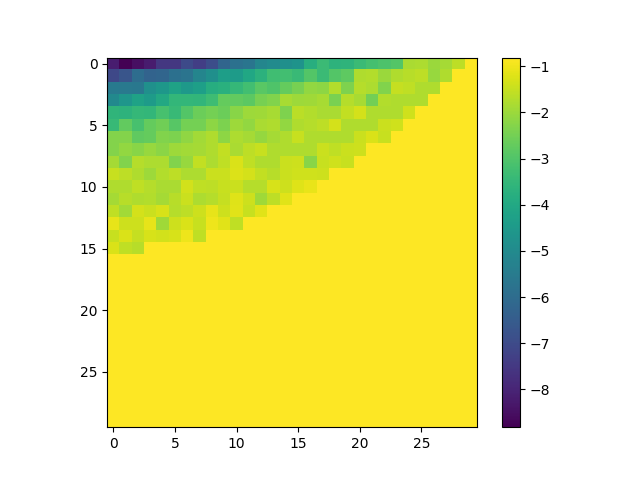

In [8]:
plt.imshow(np.nanmean(IBoffset_arr, axis=2))
plt.colorbar()

### Inference-based

In [3]:
# Get metrics for all points in the IB space
Nrew = 10
Nsw = 15
prewlst = np.linspace(0.55, 0.99, Nrew)
pswitchlst = np.linspace(0.01, 0.45, Nsw)

IBeff_arr = np.zeros((Nsw, Nrew, 50)) * np.nan
IBlapse_arr = np.zeros((Nsw, Nrew, 50)) * np.nan
IBoffset_arr = np.zeros((Nsw, Nrew, 50)) * np.nan
IBslope_arr = np.zeros((Nsw, Nrew, 50)) * np.nan


for idr, prew in enumerate(prewlst):
    for ids, pswitch in enumerate(pswitchlst):
        print(prew, pswitch)
        metrics = get_IB_metrics(pswitch, prew, rlow=rlow)
        IBeff_arr[ids, idr, :] = metrics[0]
        IBlapse_arr[ids, idr, :] = metrics[1]
        IBoffset_arr[ids, idr, :] = metrics[2]
        IBslope_arr[ids, idr, :] = metrics[3]
        

0.55 0.01
0.55 0.04142857142857143
0.55 0.07285714285714286
0.55 0.10428571428571429
0.55 0.13571428571428573
0.55 0.16714285714285715


/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/src/utils.py:334: RuntimeWarning: overflow encountered in exp
  return gamma + (1 - gamma - lamb) * 1 / (1 + np.exp(-p[0] * (x + p[1])))


0.55 0.1985714285714286
0.55 0.23000000000000004
0.55 0.26142857142857145
0.55 0.29285714285714287
0.55 0.3242857142857143
0.55 0.35571428571428576
0.55 0.3871428571428572
0.55 0.4185714285714286
0.55 0.45
0.5988888888888889 0.01
0.5988888888888889 0.04142857142857143
0.5988888888888889 0.07285714285714286
0.5988888888888889 0.10428571428571429
0.5988888888888889 0.13571428571428573
0.5988888888888889 0.16714285714285715
0.5988888888888889 0.1985714285714286
0.5988888888888889 0.23000000000000004
0.5988888888888889 0.26142857142857145
0.5988888888888889 0.29285714285714287
0.5988888888888889 0.3242857142857143
0.5988888888888889 0.35571428571428576
0.5988888888888889 0.3871428571428572
0.5988888888888889 0.4185714285714286
0.5988888888888889 0.45
0.6477777777777778 0.01
0.6477777777777778 0.04142857142857143
0.6477777777777778 0.07285714285714286
0.6477777777777778 0.10428571428571429
0.6477777777777778 0.13571428571428573
0.6477777777777778 0.16714285714285715
0.6477777777777778 0.198

### Decoding
Here, we will try to use SVM to decode the behavior of Q-learning from inference-based.
We pick pairs of parameter sets, one from Q-learning and one from inference-based, to do the decoding

In [4]:
# SVM decode (deprecated)
decoding_perf = np.zeros((len(gammalst), len(epslst), len(prewlst), len(pswitchlst)))
coefs_all0 = np.zeros((len(gammalst), len(epslst), len(prewlst), len(pswitchlst)))
coefs_all1 = np.zeros((len(gammalst), len(epslst), len(prewlst), len(pswitchlst)))
coefs_all2 = np.zeros((len(gammalst), len(epslst), len(prewlst), len(pswitchlst)))
coefs_all3 = np.zeros((len(gammalst), len(epslst), len(prewlst), len(pswitchlst)))

for idgamma, gamma in enumerate(gammalst):
    for ideps, eps in enumerate(epslst):
        for idr, pr in enumerate(prewlst):
            for ids, ps in enumerate(pswitchlst):
                Qmetrics = [Qeff_arr[idgamma, ideps], Qlapse_arr[idgamma, ideps], 
                            Qoffset_arr[idgamma, ideps], Qslope_arr[idgamma, ideps]]
                IBmetrics = [IBeff_arr[ids, idr], IBlapse_arr[ids, idr], 
                            IBoffset_arr[ids, idr], IBslope_arr[ids, idr]]
                perf, coefs = fit_and_evaluate_svm(Qmetrics, IBmetrics)
                decoding_perf[idgamma, ideps, idr, ids] = perf
                coefs_all0[idgamma, ideps, idr, ids] = coefs[0][0]
                coefs_all1[idgamma, ideps, idr, ids] = coefs[0][1]
                coefs_all2[idgamma, ideps, idr, ids] = coefs[0][2]
                coefs_all3[idgamma, ideps, idr, ids] = coefs[0][3]



In [5]:
paths = pathsetup('matchingsim')

prob = rlow
datestr = '010522'
if not os.path.exists(f"{paths['svmdatapath']}/{datestr}"):
    os.mkdir(f"{paths['svmdatapath']}/{datestr}")
sim_obj = {'Qeff_arr': Qeff_arr, 'Qlapse_arr': Qlapse_arr, 'Qoffset_arr': Qoffset_arr, 
          'Qslope_arr': Qslope_arr, 'IBeff_arr': IBeff_arr, 'IBlapse_arr': IBlapse_arr,
          'IBslope_arr': IBslope_arr, 'IBoffset_arr': IBoffset_arr,
          'prewlst': prewlst, 'pswitchlst': pswitchlst, 'gammalst': gammalst,
          'epslst': epslst, 'order': ['gamma', 'eps', 'pr', 'ps']}

scipy.io.savemat(f"{paths['svmdatapath']}/{datestr}/svmresults_from_pickle_{datestr}_prob{prob:.2f}.mat", sim_obj)

In [ ]:
# scipy.io.savemat('svmresults2.mat', {'coefs0': coefs_all0, 'coefs1': coefs_all1, 'coefs2': coefs_all2,
#                                    'coefs3': coefs_all3, 'decoding_perf': decoding_perf,
#                                    'prewlst': prewlst, 'pswitchlst': pswitchlst, 'gammalst': gammalst,
#                                    'epslst': epslst, 'order': ['gamma', 'eps', 'pr', 'ps']})

## Behavioral session decoding

In [2]:
# Load the simulation results
with open('svmclassifier.pickle', 'rb') as f:
    sim_obj = pickle.load(f)

eff_arr_all = np.vstack([sim_obj['Qeff_arr'], sim_obj['IBeff_arr']])
lapse_arr_all = np.vstack([sim_obj['Qlapse_arr'], sim_obj['IBlapse_arr']])
offset_arr_all = np.vstack([sim_obj['Qoffset_arr'], sim_obj['IBoffset_arr']])
slope_arr_all = np.vstack([sim_obj['Qslope_arr'], sim_obj['IBslope_arr']])

 14%|█▍        | 9/65 [00:00<00:00, 77.30it/s]

Number of sessions before delay: 65


100%|██████████| 65/65 [00:01<00:00, 40.63it/s]


<IPython.core.display.Javascript object>


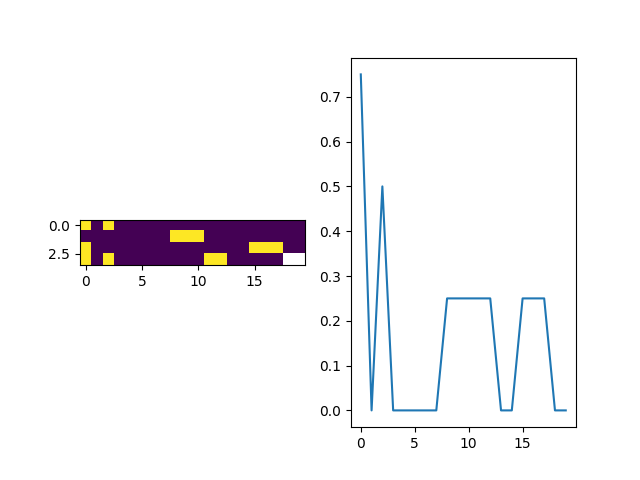

In [2]:
# Load the behavior
animal = 'f11'
filename = 'expdata/' + animal + '_all_sessions.mat'
data = scipy.io.loadmat(filename)

datarange = -1

delaystartcands = np.where(data['maxdelays'] > 0)[1]

if len(delaystartcands) == 0:
    delaystart = len(data['maxdelays'][0])
else:
    delaystart = delaystartcands[0]
print('Number of sessions before delay:', delaystart)

# Fitting for all files
qpos_all = []
ibpos_all = []

pL_all = []
pR_all = []
eff_all = []

if datarange == -1:
    datarange = np.arange(0, len(data['targets_cell'][0]))
else:
    datarange = np.arange(datarange[0], datarange[1])

# f01: 29
# f02: 29
# e50: 30
# f11: 28
# f12: 29
for i in tqdm(datarange): #tqdm(range(len(data['targets_cell'][0]))):
#     print(i)
    expdata = {'alltargets': data['targets_cell'][0][i], 
           'allchoices': data['choices_cell'][0][i]}
    
    if len(expdata['alltargets']) == 0 or len(np.unique(expdata['alltargets'])) == 1:
        qpos_all.append([-1, -1])
        ibpos_all.append([-1, -1])
        pL_all.append([np.nan] * 3)
        pR_all.append([np.nan] * 3)
        eff_all.append(np.nan)
    else:
        pR, pL, choicelst, eff = find_experiment_metrics(expdata, window=20, type='doublesigmoid')
        
        # skip if too few blocks
        if choicelst.shape[0] <= 5:
            pL_all.append([np.nan] * 3)
            pR_all.append([np.nan] * 3)
            eff_all.append(np.nan)
        else:
            pL_all.append(pL)
            pR_all.append(pR)
            eff_all.append(eff)

#         Qdistance, IBdistance, expeff, expl, expo, exps = find_Q_IB_ave_distance([eff, pL], [eff_arr_all,
#                             lapse_arr_all, offset_arr_all, slope_arr_all])
#         Qdistance, IBdistance = find_Q_IB_zdistance([eff, [pL[0], pL[0], pL[1]]], [eff_arr_all,
#                             lapse_arr_all, offset_arr_all, slope_arr_all])
#         qpos = [np.where(Qdistance == np.nanmin(Qdistance))[0][0],
#            np.where(Qdistance == np.nanmin(Qdistance))[1][0]]
#         ibpos = [np.where(IBdistance == np.nanmin(IBdistance))[0][0],
#                 np.where(IBdistance == np.nanmin(IBdistance))[1][0]]

#         qpos_all.append(qpos)
#         ibpos_all.append(ibpos)
    
    
    

plt.figure()
plt.subplot(121)
plt.imshow(choicelst[::2,:])

plt.subplot(122)
plt.plot(np.nanmean(choicelst[::2,:], axis=0))

In [ ]:
leftAverage = np.nanmean(choicelst[1::2,:], axis=0)
rightAverage = np.nanmean(choicelst[::2,:], axis=0)
offsets = np.arange(len(leftAverage))
p = fit_doublesigmoid_helper(leftAverage, rightAverage)
errordoublesigmoid(p, offsets, 1-rightAverage, offsets, leftAv)

In [6]:
pL_all, pR_all, eff_all = fit_animal('f22')

 50%|█████     | 9/18 [00:00<00:00, 62.85it/s]

Number of sessions before delay: 18


100%|██████████| 18/18 [00:00<00:00, 40.22it/s]
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/expfitting.py:67: RuntimeWarning: Mean of empty slice
  meanoffsets = np.nanmean(-offsets, axis=0)
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/expfitting.py:68: RuntimeWarning: All-NaN slice encountered
  maxlapses = np.nanmax(lapses, axis=0)


ValueError: too many values to unpack (expected 3)

### Visualizing single session fits

In [4]:
type = 'doublesigmoid'
if type == 'sigmoid':
    evalfun = predict_sigmoid
else:
    evalfun = exp_fun2
    
animal = 'f01'
filename = 'expdata/' + animal + '_all_sessions.mat'
data = scipy.io.loadmat(filename)

@interact(i=(0, 50))
def explore_data(i=20):
    expdata = {'alltargets': data['targets_cell'][0][i], 
               'allchoices': data['choices_cell'][0][i]}

    first_side=1-expdata['alltargets'][0][0]
    pR, pL, choicelst, eff = find_experiment_metrics(expdata, window=20, type=type)
    print('nblocks:', choicelst.shape[0])
    print('slope, offset L, lapse low', pL)
    print('slope, offset R, lapse high', pR)
    plt.figure()
    plt.subplot(122)
    xvals = np.arange(choicelst.shape[1])

    if type == 'sigmoid':
        plt.plot(1-np.nanmean(1 - choicelst[first_side::2,:], axis=0))
    elif type == 'exponential':
        plt.plot(np.nanmean(1 - choicelst[first_side::2,:], axis=0))
    elif type == 'doublesigmoid':
        predR = predict_doublesigmoid(xvals, [pR[0], pR[1], pL[2], pR[2]])
        plt.plot(np.nanmean(choicelst[1-first_side::2,:], axis=0))
        plt.plot(1-predR)
    plt.ylim([0, 1])
    plt.title('Right fit')

    plt.subplot(121)
    plt.plot(np.nanmean(choicelst[first_side::2,:], axis=0))
    if type == 'doublesigmoid':
        predL = predict_doublesigmoid(xvals, [pL[0], pL[1], pR[2], pL[2]])
        plt.plot(xvals, predL)

#     ypred = evalfun(xvals, pL)
    plt.ylim([0, 1])
    plt.title('Left fit')


interactive(children=(IntSlider(value=20, description='i', max=50), Output()), _dom_classes=('widget-interact'…

In [7]:
slopes, offsets, lapses, pL, pR, eff = fit_animal('f01')

  9%|▉         | 10/113 [00:00<00:01, 77.24it/s]

Number of sessions before delay: 29


100%|██████████| 113/113 [00:03<00:00, 37.51it/s]


<IPython.core.display.Javascript object>


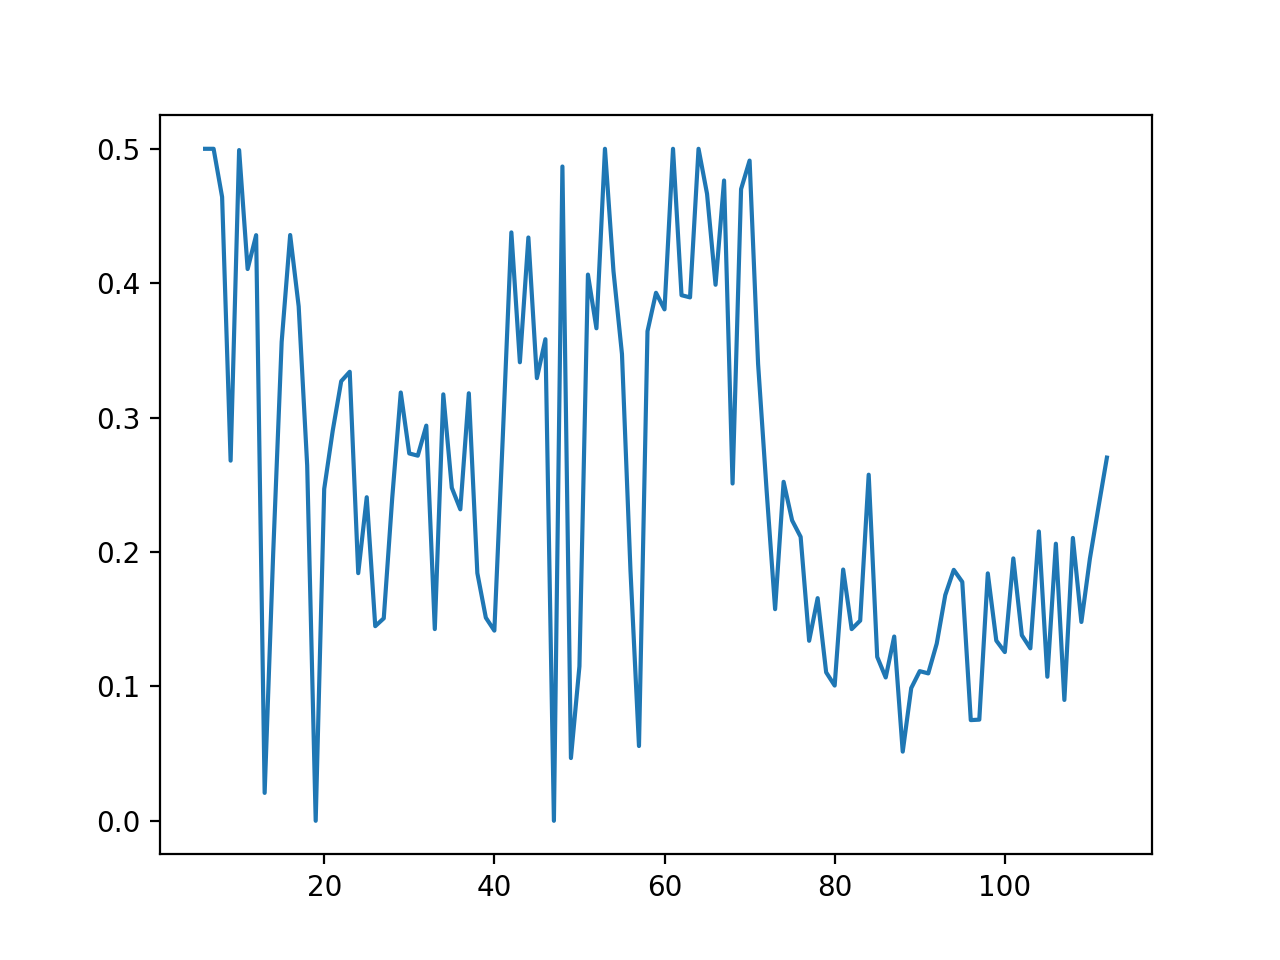

In [11]:
plt.plot(lapses)

In [12]:
all_animals = ['f01', 'f02', 'f11', 'f12', 'f16', 'f17', 'f20', 'f21', 'fh02', 'fh03', 'e35',
              'e54', 'e57', 'e46', 'e56']
fitparams_all = {}
for animal in all_animals:
    if animal in fitparams_all.keys():
        continue
    print('Fitting animal:', animal)
    fitparams = fit_animal(animal)
    fitparams_all[animal] = fitparams


  9%|▉         | 10/113 [00:00<00:01, 82.43it/s]

Fitting animal: f01
Number of sessions before delay: 29


100%|██████████| 113/113 [00:02<00:00, 38.26it/s]
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/expfitting.py:67: RuntimeWarning: Mean of empty slice
  meanoffsets = np.nanmean(-offsets, axis=0)
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/expfitting.py:68: RuntimeWarning: All-NaN slice encountered
  maxlapses = np.nanmax(lapses, axis=0)
  8%|▊         | 9/110 [00:00<00:01, 82.27it/s]

Fitting animal: f02
Number of sessions before delay: 29


 14%|█▍        | 9/65 [00:00<00:00, 74.79it/s]

Fitting animal: f11
Number of sessions before delay: 65


 14%|█▍        | 9/64 [00:00<00:00, 78.59it/s]

Fitting animal: f12
Number of sessions before delay: 64


 23%|██▎       | 7/31 [00:00<00:00, 59.10it/s]

Fitting animal: f16
Number of sessions before delay: 31


 32%|███▏      | 10/31 [00:00<00:00, 80.73it/s]

Fitting animal: f17
Number of sessions before delay: 31


 37%|███▋      | 11/30 [00:00<00:00, 96.05it/s]

Fitting animal: f20
Number of sessions before delay: 30


 37%|███▋      | 11/30 [00:00<00:00, 94.82it/s]

Fitting animal: f21
Number of sessions before delay: 30


 30%|███       | 6/20 [00:00<00:00, 50.74it/s]

Fitting animal: fh02
Number of sessions before delay: 16


 22%|██▏       | 8/37 [00:00<00:00, 64.06it/s]

Fitting animal: fh03
Number of sessions before delay: 27


 30%|███       | 17/56 [00:00<00:00, 158.74it/s]

Fitting animal: e35
Number of sessions before delay: 48


  5%|▍         | 7/147 [00:00<00:02, 57.33it/s]

Fitting animal: e54
Number of sessions before delay: 26


 12%|█▏        | 9/77 [00:00<00:00, 81.04it/s]

Fitting animal: e57
Number of sessions before delay: 16


 28%|██▊       | 11/39 [00:00<00:00, 96.52it/s]

Fitting animal: e46
Number of sessions before delay: 11


 19%|█▉        | 10/53 [00:00<00:00, 86.08it/s]

Fitting animal: e56
Number of sessions before delay: 23


100%|██████████| 53/53 [00:01<00:00, 38.40it/s]


 50%|█████     | 9/18 [00:00<00:00, 60.69it/s]

Number of sessions before delay: 18


100%|██████████| 18/18 [00:00<00:00, 37.83it/s]
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/expfitting.py:67: RuntimeWarning: Mean of empty slice
  meanoffsets = np.nanmean(-offsets, axis=0)
/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/expfitting.py:68: RuntimeWarning: All-NaN slice encountered
  maxlapses = np.nanmax(lapses, axis=0)


<IPython.core.display.Javascript object>


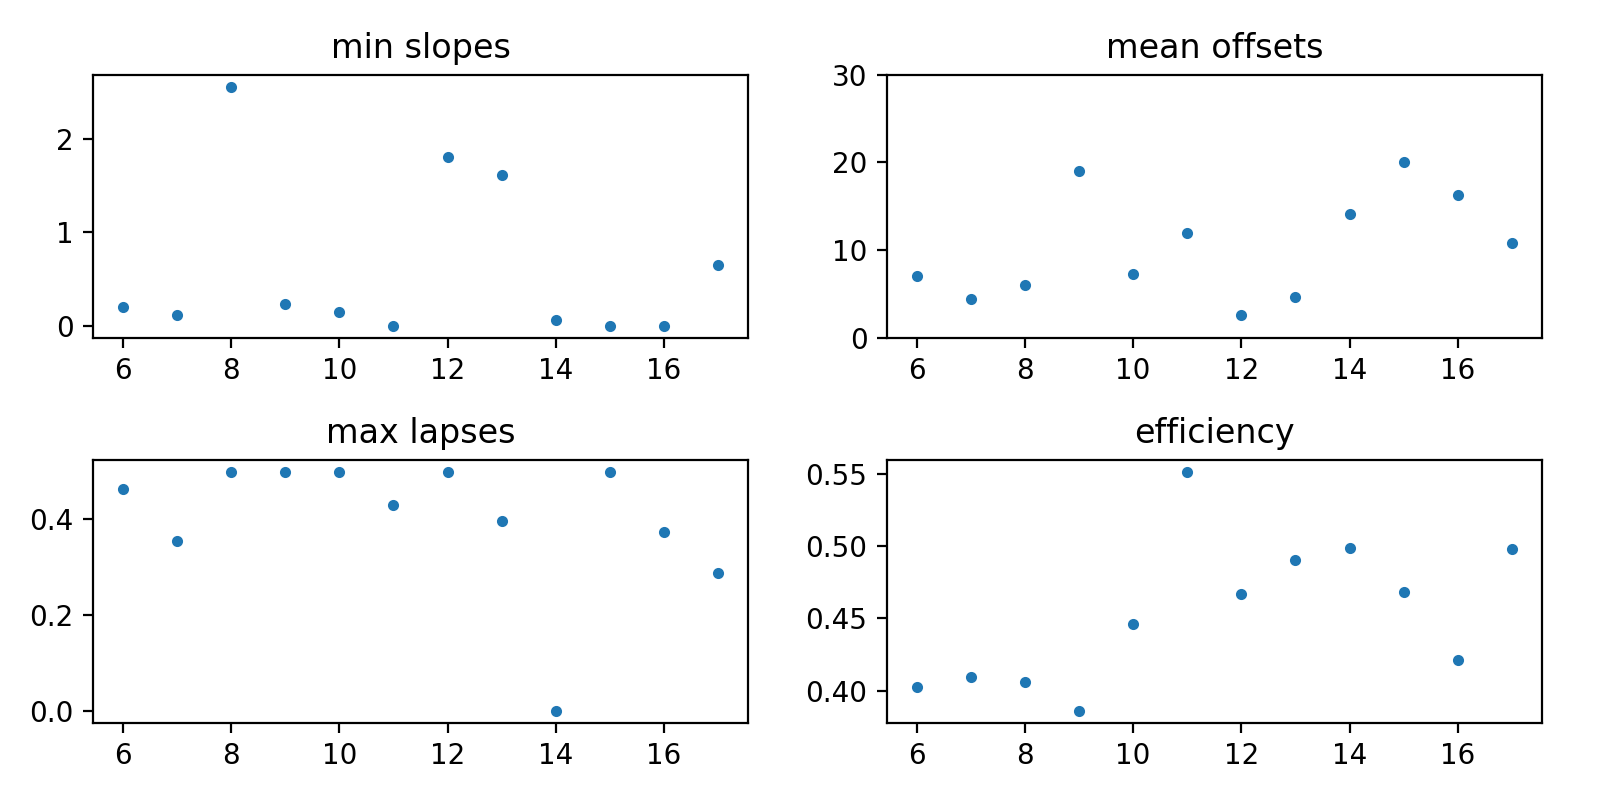

In [12]:
fitparams = fit_animal('f22')
plot_fitvals(fitparams)

In [44]:
with open('exp_paramfits.pickle', 'wb') as f:
    pickle.dump(fitparams_all, f)

In [15]:
# Define start and end of experiments
# startends = {'f01': [6, 29],
#             'f02': [6, 29],
#             'f11': [7, 28],
#             'f12': [6, 29],
#             'f16': [7, 20],
#             'f17': [6, 20],
#             'f20': [6, 22],
#             'f21': [8, 22],
#             'fh02': [2, 16],
#             'fh03': [8, 27],
#             'e35': [5, 48],
#             'e54': [3, 26],
#             'e57': [6, 20],
#             'e46': [6, 15],
#             'e56': [7, 23]} values used for lab meeting in Aug


startends = {'f01': [6, 29],
            'f02': [6, 29],
            'f11': [5, 28],
            'f12': [5, 29],
            'f16': [6, 20],
            'f17': [6, 20],
            'f20': [6, 22],
            'f21': [6, 22],
            'fh02': [2, 16],
            'fh03': [3, 27],
            'e35': [14, 48],
            'e54': [3, 26],
            'e57': [6, 20],
            'e46': [6, 11],
            'e56': [7, 23]} #values updated on 9.16.21

# Assemble grand means
expslopes_all = []
expoffsets_all = []
explapses_all = []
expeff_all = []
for animal in all_animals:
    start, end = startends[animal]
    expslopes_all.append(fitparams_all[animal][0][start:end])
    expoffsets_all.append(fitparams_all[animal][1][start:end])
    explapses_all.append(fitparams_all[animal][2][start:end])
    expeff_all.append(fitparams_all[animal][5][start:end])

expslopes_all = pad_to_same_length(expslopes_all)
expoffsets_all = pad_to_same_length(expoffsets_all)
explapses_all = pad_to_same_length(explapses_all)
expeff_all = pad_to_same_length(expeff_all)


In [16]:
# Save as mat file for plotting
scipy.io.savemat('expfit_params_092921.mat', {'all_animals': all_animals, 'expslopes_all': expslopes_all,
                                      'expoffsets_all': expoffsets_all, 'explapses_all': explapses_all,
                                      'expeff_all': expeff_all, 'startends': startends})

<IPython.core.display.Javascript object>


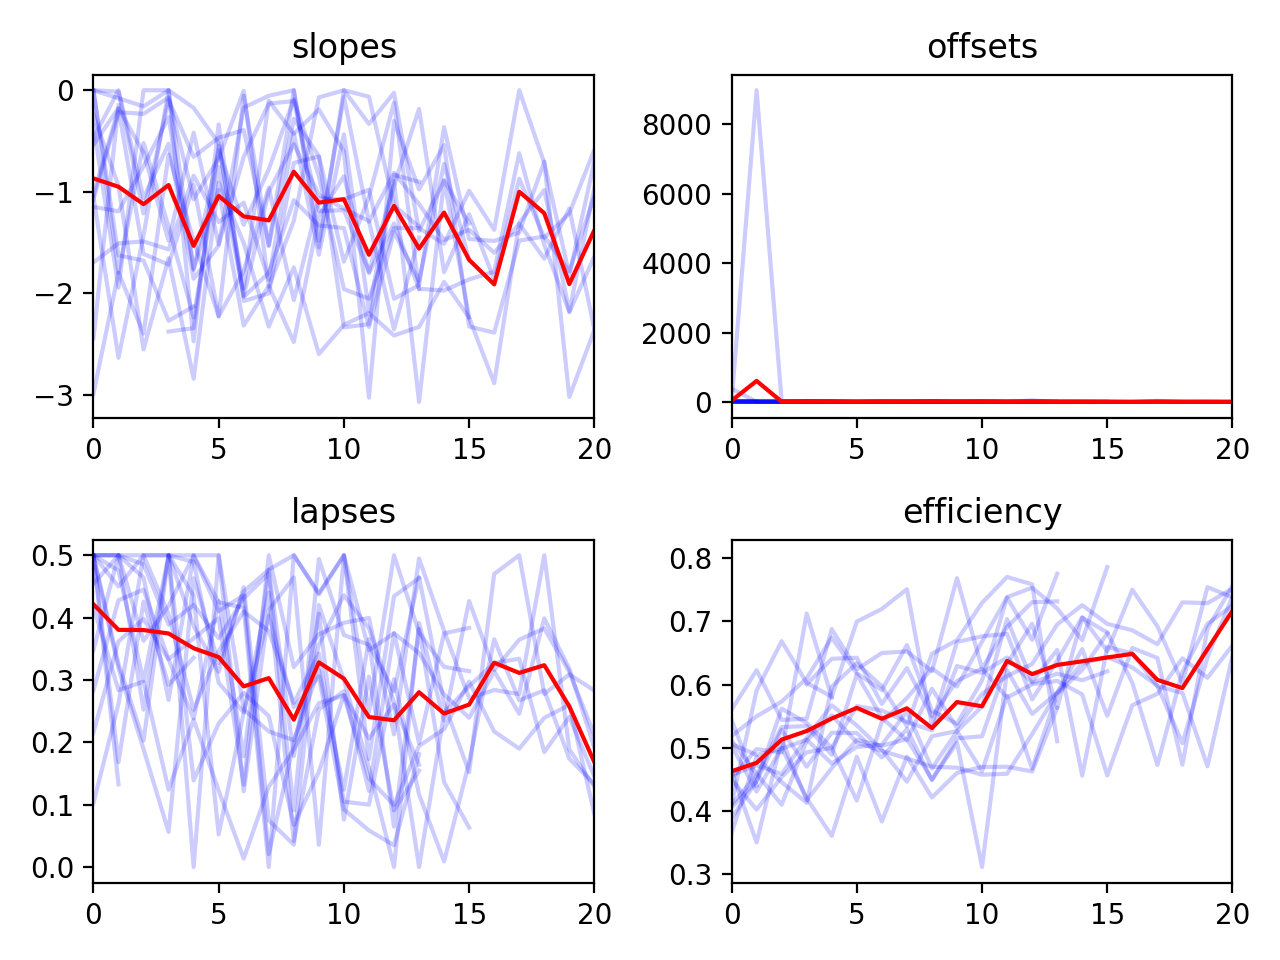

In [17]:
plt.figure()
plt.subplot(221)
for i in expslopes_all:
    plt.plot(i, 'b', alpha=0.2)
    plt.title('slopes')
plt.plot(np.nanmean(expslopes_all, axis=0), 'r')
plt.xlim(0, 20)
    
plt.subplot(222)
for i in expoffsets_all:
    plt.plot(i, 'b', alpha=0.2)
    plt.title('offsets')
plt.plot(np.nanmean(expoffsets_all, axis=0), 'r')
plt.xlim(0, 20)


    
plt.subplot(223)
for i in explapses_all:
    plt.plot(i, 'b', alpha=0.2)
    plt.title('lapses')
plt.plot(np.nanmean(explapses_all, axis=0), 'r')
plt.xlim(0, 20)


    
plt.subplot(224)
for i in expeff_all:
    plt.plot(i, 'b', alpha=0.2)
    plt.title('efficiency')
plt.plot(np.nanmean(expeff_all, axis=0), 'r')
plt.xlim(0, 20)



plt.tight_layout()

In [73]:
pad_to_same_length()
#np.pad(np.array([1,2], dtype='float'), (0,1), constant_values=np.nan)

array([[ 1.,  2., nan, nan, nan, nan],
       [ 1.,  2.,  3., nan, nan, nan],
       [ 1.,  2.,  3.,  4.,  5.,  6.]])

In [ ]:
# Curve fitting for slopes, offsets and lapses
xvalspred = np.arange(len(minslopes))
# slopes
xfitvalsS = np.arange(len(minslopes)).reshape((-1, 1))
xfitvalsS = xfitvalsS[(~np.isnan(minslopes)) & (minslopes > 0)]
yfitvalsS = np.log(minslopes[(~np.isnan(minslopes)) & (minslopes > 0)])
regS = LinearRegression().fit(xfitvalsS, yfitvalsS)
predS = np.exp(xvalspred * regS.coef_[0] + regS.intercept_)

# offsets
xfitvalsO = np.arange(len(meanoffsets)).reshape((-1, 1))
xfitvalsO = xfitvalsO[(~np.isnan(meanoffsets)) & (meanoffsets > 0)]
yfitvalsO = np.log(meanoffsets[(~np.isnan(meanoffsets)) & (meanoffsets > 0)])
regO = LinearRegression().fit(xfitvalsO, yfitvalsO)
predO = np.exp(xvalspred * regO.coef_[0] + regO.intercept_)

# lapses
xfitvalsL = np.arange(len(maxlapses)).reshape((-1, 1))
xfitvalsL = xfitvalsL[(~np.isnan(maxlapses)) & (maxlapses > 0)]
yfitvalsL = np.log(maxlapses[(~np.isnan(maxlapses)) & (maxlapses > 0)])
regL = LinearRegression().fit(xfitvalsL, yfitvalsL)
predL = np.exp(xvalspred * regL.coef_[0] + regL.intercept_)

# efficiencies
xfitvalsE = np.arange(len(eff_all)).reshape((-1,1))
yfitvalsE = eff_all.reshape((-1,1))
regE = LinearRegression().fit(xfitvalsE, yfitvalsE)
predE = xvalspred * regE.coef_[0] + regE.intercept_




In [ ]:
plt.figure(figsize=(7,10))
plt.subplot(421)
plt.plot(np.log(minslopes))
plt.plot(xfitvalsS, yfitvalsS, '.')
plt.plot(xfitvalsS, xfitvalsS * regS.coef_[0] + regS.intercept_)
plt.title('slopes')

plt.subplot(422)
plt.plot(minslopes, '.')
plt.plot(xvalspred, predS)

plt.subplot(423)
plt.plot(np.log(meanoffsets))
plt.plot(xfitvalsO, yfitvalsO, '.')
plt.plot(xfitvalsO, xfitvalsO * regO.coef_[0] + regO.intercept_)
plt.title('offsets')

plt.subplot(424)
plt.plot(meanoffsets, '.')
plt.plot(xvalspred, predO)


plt.subplot(425)
plt.plot(np.log(maxlapses))
plt.plot(xfitvalsL, yfitvalsL, '.')
plt.plot(xfitvalsL, xfitvalsL * regL.coef_[0] + regL.intercept_)
plt.title('lapses')

plt.subplot(426)
plt.plot(maxlapses, '.')
plt.plot(xvalspred, predL)

plt.subplot(427)
# plt.plot(np.log(maxlapses))
# plt.plot(xfitvalsL, yfitvalsL, '.')
# plt.plot(xfitvalsL, xfitvalsL * regL.coef_[0] + regL.intercept_)

# plt.subplot(428)
plt.plot(eff_all, '.')
plt.plot(xvalspred, predE)
plt.title('efficiencies')
plt.tight_layout()

In [ ]:
in_percentile

In [ ]:
in_percentile(eff_arr_all, 0.8)

In [ ]:
in_percentile([1,2,3,4,5], 4)

In [ ]:
# compute Q- and IB- distance
qpos_all, ibpos_all = [], []
for i in [0]: #range(len(predO)):
    Qdistance, IBdistance = find_Q_IB_zdistance((predE[i], [predS[i], -predO[i], predL[i]]), [eff_arr_all,
                            lapse_arr_all, offset_arr_all, slope_arr_all], method='percentile')
    
    qpos = [np.where(Qdistance == np.nanmin(Qdistance))[0][0],
       np.where(Qdistance == np.nanmin(Qdistance))[1][0]]
    ibpos = [np.where(IBdistance == np.nanmin(IBdistance))[0][0],
            np.where(IBdistance == np.nanmin(IBdistance))[1][0]]

    qpos_all.append(qpos)
    ibpos_all.append(ibpos)
    
    

In [ ]:
qpos

In [ ]:
plt.figure()
plt.subplot(121)
plt.plot(np.array(qpos_all))

plt.subplot(122)
plt.plot(np.array(ibpos_all))

In [ ]:
plt.figure()
plt.imshow(slopes, aspect='auto', vmin=-50, vmax=0)
plt.colorbar()
plt.tight_layout()

In [ ]:
id = 11
Qdistance, IBdistance = find_Q_IB_zdistance((predE[id], [predS[id], -predO[id], predL[id]]), [eff_arr_all,
                            lapse_arr_all, offset_arr_all, slope_arr_all])
print(np.where(Qdistance == np.min(Qdistance)), np.min(Qdistance))
plt.figure()
plt.imshow(Qdistance, vmin=0, vmax=900)
plt.colorbar()

In [ ]:
np.percentile?

In [ ]:
Qdistance

In [ ]:
id = 19
Qdistance, IBdistance, enorm, lnorm, onorm, snorm = find_Q_IB_zdistance((predE[id], [predS[id], -predO[id], predL[id]]), [eff_arr_all,
                            lapse_arr_all, offset_arr_all, slope_arr_all], method='percentile')

plt.figure()
refpoint = [0, 10]
qpos = [np.where(Qdistance == np.min(Qdistance))[0][0],
       np.where(Qdistance == np.min(Qdistance))[1][0]]
# qpos = [9,1]
ibpos = [np.where(IBdistance == np.min(IBdistance))[0][0],
        np.where(IBdistance == np.min(IBdistance))[1][0]]
print('qpos = ', qpos, '. ibpos =', ibpos)
plt.subplot(221)
plt.plot(sim_obj['Qeff_arr'][qpos[0], qpos[1]])
plt.plot(sim_obj['Qeff_arr'][refpoint[0], refpoint[1]])
# plt.plot(sim_obj['IBeff_arr'][ibpos[0], ibpos[1]])
plt.title('Efficiency')
plt.hlines(predE[id], 0, 50)

plt.subplot(222)
plt.plot(sim_obj['Qlapse_arr'][qpos[0], qpos[1]])
plt.plot(sim_obj['Qlapse_arr'][refpoint[0], refpoint[1]])
# plt.plot(sim_obj['IBlapse_arr'][ibpos[0], ibpos[1]])
plt.title('Lapse')
plt.hlines(predL[id], 0, 50)


plt.subplot(223)
plt.plot(sim_obj['Qslope_arr'][qpos[0], qpos[1]])
plt.plot(sim_obj['Qslope_arr'][refpoint[0], refpoint[1]])
# plt.plot(sim_obj['IBslope_arr'][ibpos[0], ibpos[1]])
plt.title('slope')
plt.ylim([0,10])
plt.hlines(predS[id], 0, 50)


plt.subplot(224)
plt.plot(sim_obj['Qoffset_arr'][qpos[0], qpos[1]])
plt.plot(sim_obj['Qoffset_arr'][refpoint[0], refpoint[1]])
# plt.plot(sim_obj['IBoffset_arr'][ibpos[0], ibpos[1]])
plt.title('offset')
plt.hlines(-predO[id], 0, 50)
# plt.ylim([-10,0])

plt.tight_layout()


In [ ]:
print('enorm:', enorm[:11,:][9,0], enorm[:11,:][0,10])
print('snorm:', snorm[:11,:][9,0], snorm[:11,:][0,10])
print('onorm:', onorm[:11,:][9,0], onorm[:11,:][0,10])
print('lnorm:', lnorm[:11,:][9,0], lnorm[:11,:][0,10])